DRILL: What's the seasons?

Look at the data we created in the beginning. Analyze it to figure out how big a cycle is. Use your programming skills to derive the cycle time rather than looking at the code used to create the series.

In [0]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Create a data frame.
learning_progress = pd.DataFrame()

# Add a range of 100 dates starting Jan 1, 2017.
learning_progress['date'] = pd.date_range(start='2017-01-01', periods=100)

# Add linearly increasing knowledge and oscillating confidence.
learning_progress['knowledge'] = np.arange(0, 100)
learning_progress['confidence'] = 10 * np.cos(np.arange(0, 100) * np.pi / 7) + np.arange(0, 100)

Text(0.5, 1.0, 'Scatter Plot')

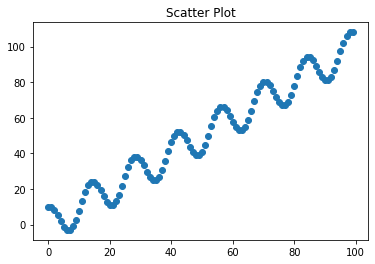

In [5]:
plt.scatter(learning_progress.knowledge, learning_progress.confidence)
plt.title('Scatter Plot')

Text(0.5, 1.0, 'Linked Scatter Plot')

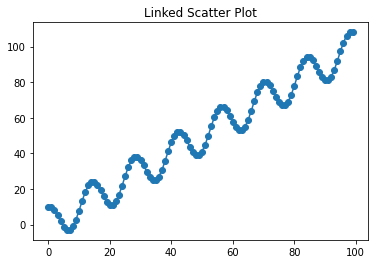

In [6]:
plt.scatter(learning_progress.knowledge, learning_progress.confidence)
plt.plot(learning_progress.knowledge, learning_progress.confidence)
plt.title('Linked Scatter Plot')

No handles with labels found to put in legend.


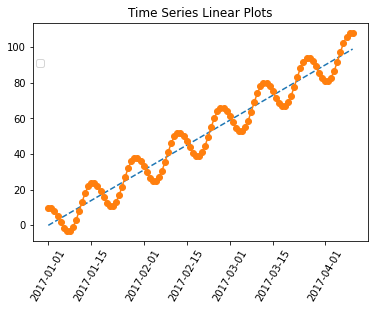

In [7]:
plt.plot(learning_progress.date, learning_progress.knowledge, '--')
plt.plot(learning_progress.date, learning_progress.confidence, 'o-')
plt.xticks(rotation=60)
plt.legend(loc = (.01,.8))
plt.title('Time Series Linear Plots')
plt.show()

In [0]:
# Create a data frame.
learning_progress = pd.DataFrame()

# Add a range of 100 dates starting Jan 1, 2017.
learning_progress['date'] = pd.date_range(start='2017-01-01', periods=100)

# Add linearly increasing knowledge and oscillating confidence.
learning_progress['knowledge'] = np.arange(0, 100)
learning_progress['confidence'] = 10 * np.cos(np.arange(0, 100) * np.pi / 3.5) + np.arange(0, 100)

In [0]:
from sklearn import linear_model
lm = linear_model.LinearRegression()

# Note that for sklearn we must convert our data to numeric.
X = pd.DataFrame(pd.to_numeric(learning_progress['date']))
Y = learning_progress['confidence']
lm.fit(X, Y)
lm.score(X, Y)

0.9434054498353519



---



---



# Drill - Analysis to find a cycle

In [13]:
# How big is a cycle?

#derive cycle time


learning_progress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        100 non-null    datetime64[ns]
 1   knowledge   100 non-null    int64         
 2   confidence  100 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.5 KB


# convert date column to month, month name, day of week and day of week number

In [0]:
df = learning_progress

df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.month_name()
df['weekday'] = df['date'].dt.weekday
df['weekday_name'] = df['date'].dt.day_name()
df['quarter'] = df['date'].dt.quarter

learning_progress = df

In [20]:
learning_progress.head()

,date,knowledge,confidence,month,month_name,weekday,weekday_name,quarter
0,2017-01-01,0,10.000000,1,January,6,Sunday,1
1,2017-01-02,1,7.234898,1,January,0,Monday,1
2,2017-01-03,2,-0.225209,1,January,1,Tuesday,1
3,2017-01-04,3,-6.009689,1,January,2,Wednesday,1
4,2017-01-05,4,-5.009689,1,January,3,Thursday,1


#Line Plot of Numerical Features

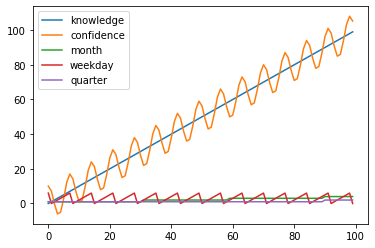

In [24]:
learning_progress[['knowledge', 'confidence','month', 'weekday', 'quarter']].plot()

Interesting to see how the weekday variable oscillates around the quarter and month variables.

# Line plot of the engineered numerical features - month, weekday and quarter

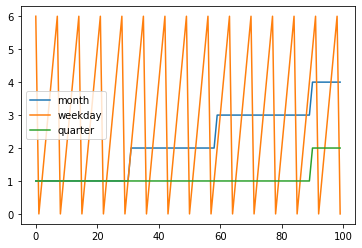

In [23]:
learning_progress[['month', 'weekday', 'quarter']].plot()

#Scatterplot

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  del sys.path[0]


<Figure size 1440x1800 with 0 Axes>

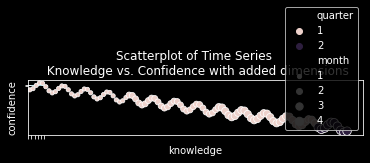

In [47]:
c = learning_progress[['knowledge', 'confidence', 'month', 'weekday', 'quarter']]

import seaborn as sns 

# plt.style.use('dark_background')


plt.figure(figsize=(20,25))
sns.palplot(sns.light_palette((210, 90, 60), input="husl",))
sns.scatterplot(x='knowledge', y='confidence', data = c, hue='quarter', size='month', legend = 'full')
plt.title('Scatterplot of Time Series \n Knowledge vs. Confidence with added dimensions')
plt.legend()
plt.tight_layout()
plt.show()

Unsure how I got this to look this way but it looks cool and shows the inverse linear relationship created between confidence and knowledge which seems to pique in the 2nd quarter

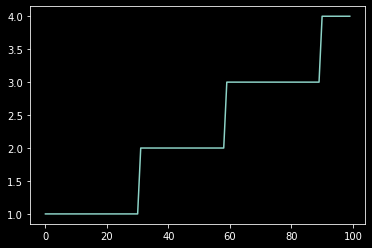

In [48]:
plt.plot(c.knowledge, c.month)

Here, I believe we can assume that there is a positive correlation between knowledge and Month number. 

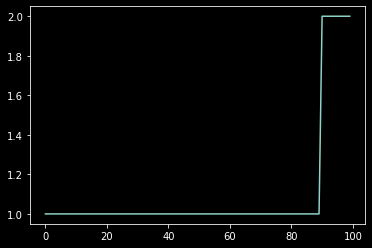

In [49]:
plt.plot(c.knowledge, c.quarter)

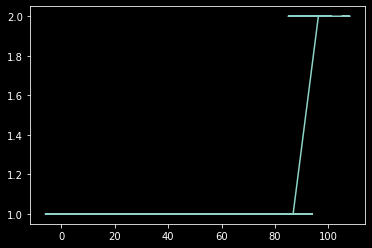

In [70]:
plt.plot(c.confidence, c.quarter)

Here the graph is telling us that knowledge tends to stay flat until a massive increase around the 80% interval, coinenciding with the beginning of the 2nd Quarter -- a pattern we did not witness using the scatterplot. 

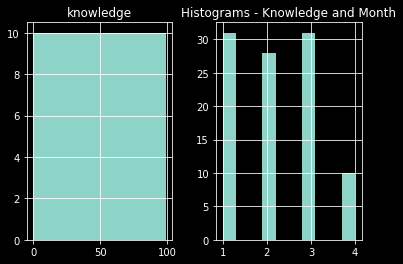

In [56]:
c[['knowledge', 'month']].hist(bins=10)
plt.title('Histograms - Knowledge and Month');

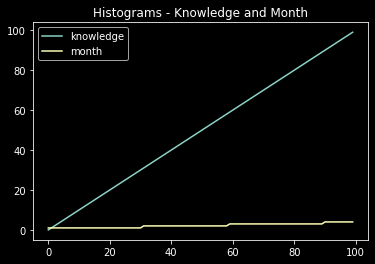

In [59]:
c[['knowledge', 'month']].plot()
plt.title('Histograms - Knowledge and Month');

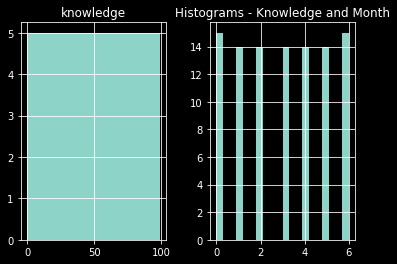

In [58]:
c[['knowledge', 'weekday']].hist(bins=20)
plt.title('Histograms - Knowledge and Month');

In [60]:
c.head()

,knowledge,confidence,month,weekday,quarter
0,0,10.000000,1,6,1
1,1,7.234898,1,0,1
2,2,-0.225209,1,1,1
3,3,-6.009689,1,2,1
4,4,-5.009689,1,3,1


#Machine Learning - Linear Regression

##Distribution of our Independent and Dependent Variables

# Confidence v. Month

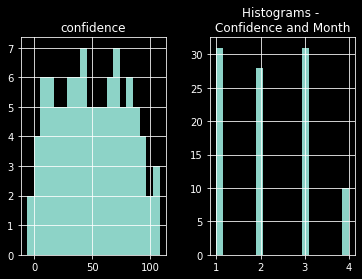

In [66]:
c[['confidence', 'month']].hist(bins=20)
plt.title('Histograms - \nConfidence and Month');

In [61]:
lm = linear_model.LinearRegression()

# Note that for sklearn we must convert our data to numeric.
X = c[['month']]
Y = c['confidence']
lm.fit(X, Y)
lm.score(X, Y)

0.8588335897218221

# Confidence v. Weekday

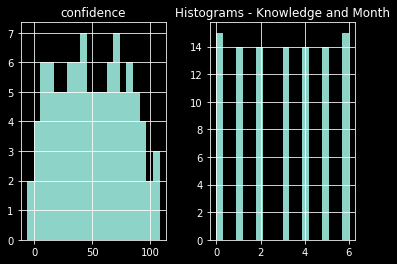

In [64]:
c[['confidence', 'weekday']].hist(bins=20)
plt.title('Histograms - Knowledge and Month');

In [69]:
lm = linear_model.LinearRegression()

# Note that for sklearn we must convert our data to numeric.
X = c[['weekday']]
Y = c['confidence']
lm.fit(X, Y)
lm.score(X, Y)

0.009747712003728037

#Confidence v. Quarter

In [63]:
lm = linear_model.LinearRegression()

# Note that for sklearn we must convert our data to numeric.
X = c[['quarter']]
Y = c['confidence']
lm.fit(X, Y)
lm.score(X, Y)

0.2768723526922572

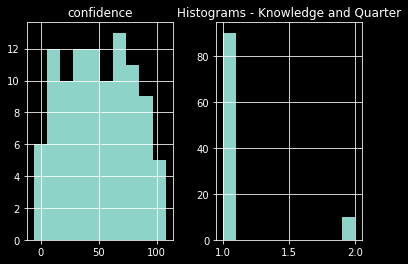

In [73]:
c[['confidence', 'quarter']].hist()
plt.title('Histograms - Knowledge and Quarter');

#Conclusion

Evaluating the linear models above, we see that the model becomes increasing less confident when we utilize different idependent variables. 

